In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/all_store_latest.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
0,0,28780,50005854,TENDO SUSHI,Queens,11385.0,Japanese,2019-02-19,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,A,2019-02-19,2021-12-01,Cycle Inspection / Initial Inspection,40.708195,-73.897878
1,1,89799,50005854,TENDO SUSHI,Queens,11385.0,Japanese,2019-02-19,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,13.0,A,2019-02-19,2021-12-01,Cycle Inspection / Initial Inspection,40.708195,-73.897878
2,2,172776,50005854,TENDO SUSHI,Queens,11385.0,Japanese,2019-02-19,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,2019-02-19,2021-12-01,Cycle Inspection / Initial Inspection,40.708195,-73.897878
3,3,1,41396677,STAND 132,Bronx,10451.0,American,2019-08-14,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,12.0,A,2019-08-14,2021-12-01,Cycle Inspection / Initial Inspection,40.829028,-73.928496
4,4,269271,41396677,STAND 132,Bronx,10451.0,American,2019-08-14,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,12.0,A,2019-08-14,2021-12-01,Cycle Inspection / Initial Inspection,40.829028,-73.928496


In [ ]:
#1.根据菜系,评分和cf进行分组，计算每种菜系的每类评级的餐馆数量
df1 = df.groupby(["CUISINE DESCRIPTION",'GRADE','CRITICAL FLAG']).agg({"CAMIS":'count','SCORE':'mean'}).reset_index()
df1

,CUISINE DESCRIPTION,GRADE,CRITICAL FLAG,CAMIS,SCORE
0,Afghan,A,Critical,9,10.666667
1,Afghan,A,Not Critical,13,9.153846
2,Afghan,B,Critical,3,20.000000
3,Afghan,B,Not Critical,1,20.000000
4,Afghan,Z,Not Critical,2,4.000000
...,...,...,...,...,...
603,Vegetarian,B,Not Critical,3,20.666667
604,Vegetarian,C,Critical,11,48.545455
605,Vegetarian,C,Not Critical,6,45.666667
606,Vegetarian,N,Critical,6,45.500000


In [ ]:
#2.根据critical flag来进行分类，可视化每种菜系的critical flag情况
criticalflag = df.groupby(['CUISINE DESCRIPTION','CRITICAL FLAG']).agg({'CAMIS':'count'}).reset_index()
criticalflag

,CUISINE DESCRIPTION,CRITICAL FLAG,CAMIS
0,Afghan,Critical,12
1,Afghan,Not Critical,16
2,African,Critical,145
3,African,Not Critical,108
4,American,Critical,5721
...,...,...,...
166,Turkish,Not Critical,92
167,Vegan,Critical,45
168,Vegan,Not Critical,57
169,Vegetarian,Critical,117


In [ ]:

criticalflag1 = criticalflag.sort_values(by = 'CAMIS')
criticalflag1

,CUISINE DESCRIPTION,CRITICAL FLAG,CAMIS
101,Lebanese,Critical,1
32,Chilean,Not Critical,1
113,New French,Critical,1
154,Southwestern,Not Critical,2
47,Czech,Critical,2
...,...,...,...
40,Coffee/Tea,Not Critical,2118
34,Chinese,Not Critical,2913
33,Chinese,Critical,3089
4,American,Critical,5721


In [ ]:
#3.每一种菜系的总数
cuisine = criticalflag.groupby(["CUISINE DESCRIPTION"]).agg({"CAMIS":'sum'}).reset_index()
cuisine

,CUISINE DESCRIPTION,CAMIS
0,Afghan,28
1,African,253
2,American,11599
3,Asian/Asian Fusion,1040
4,Australian,55
...,...,...
81,Tex-Mex,841
82,Thai,840
83,Turkish,176
84,Vegan,102


# **Critial Flag**

In [ ]:
criticalflag['PERCENT'] = criticalflag.apply(lambda x: x['CAMIS'] / 
                                                 cuisine.loc[cuisine['CUISINE DESCRIPTION']==x['CUISINE DESCRIPTION']]['CAMIS'].values[0],axis = 1)
criticalflag

,CUISINE DESCRIPTION,CRITICAL FLAG,CAMIS,PERCENT
0,Afghan,Critical,12,0.428571
1,Afghan,Not Critical,16,0.571429
2,African,Critical,145,0.573123
3,African,Not Critical,108,0.426877
4,American,Critical,5721,0.493232
...,...,...,...,...
166,Turkish,Not Critical,92,0.522727
167,Vegan,Critical,45,0.441176
168,Vegan,Not Critical,57,0.558824
169,Vegetarian,Critical,117,0.493671


In [ ]:
critical = criticalflag.loc[criticalflag['CRITICAL FLAG'].isin(['Critical'])]
critical = critical.sort_values(by = 'PERCENT')
critical

,CUISINE DESCRIPTION,CRITICAL FLAG,CAMIS,PERCENT
101,Lebanese,Critical,1,0.200000
141,Scandinavian,Critical,5,0.312500
113,New French,Critical,1,0.333333
47,Czech,Critical,2,0.333333
79,Hotdogs/Pretzels,Critical,21,0.362069
...,...,...,...,...
53,Egyptian,Critical,16,0.666667
45,Creole/Cajun,Critical,15,0.681818
111,New American,Critical,11,0.687500
31,Chilean,Critical,3,0.750000


In [ ]:


notcritical = criticalflag.loc[criticalflag['CRITICAL FLAG'].isin(['Not Critical'])]
notcritical = notcritical.sort_values(by = 'PERCENT')
notcritical

,CUISINE DESCRIPTION,CRITICAL FLAG,CAMIS,PERCENT
32,Chilean,Not Critical,1,0.250000
112,New American,Not Critical,5,0.312500
46,Creole/Cajun,Not Critical,7,0.318182
54,Egyptian,Not Critical,8,0.333333
24,Cajun,Not Critical,8,0.363636
...,...,...,...,...
80,Hotdogs/Pretzels,Not Critical,37,0.637931
114,New French,Not Critical,2,0.666667
48,Czech,Not Critical,4,0.666667
142,Scandinavian,Not Critical,11,0.687500


In [ ]:
criticalflag2 = criticalflag.sort_values(by = 'PERCENT')
criticalflag2

,CUISINE DESCRIPTION,CRITICAL FLAG,CAMIS,PERCENT
101,Lebanese,Critical,1,0.200000
32,Chilean,Not Critical,1,0.250000
141,Scandinavian,Critical,5,0.312500
112,New American,Not Critical,5,0.312500
46,Creole/Cajun,Not Critical,7,0.318182
...,...,...,...,...
142,Scandinavian,Not Critical,11,0.687500
111,New American,Critical,11,0.687500
31,Chilean,Critical,3,0.750000
102,Lebanese,Not Critical,4,0.800000


In [ ]:
#4.
#criticalflag = criticalflag.drop(['CAMIS'], axis = 1)
#criticalflag.to_csv('/content/drive/MyDrive/Colab Notebooks/data/criticalflag.csv')
criticalflag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/criticalflag.csv')
criticalflag = criticalflag.drop(['Unnamed: 0'],axis = 1)
criticalflag = criticalflag.sort_values(by = 'Critical', ascending = False)
criticalflag

,CUISINE DESCRIPTION,Critical,Not Critical
9,Basque,0.833333,0.166667
23,Creole/Cajun,0.714286,0.285714
66,Portuguese,0.593023,0.406977
16,Chilean,0.571429,0.428571
7,Bangladeshi,0.558767,0.441233
...,...,...,...
37,Hamburgers,0.392062,0.607938
75,Soups/Salads/Sandwiches,0.374803,0.625197
0,Afghan,0.353535,0.646465
57,New French,0.333333,0.666667


In [ ]:
criticalflag.columns[1:3]

Index(['Critical', 'Not Critical'], dtype='object')

Text(0.5, 1.0, 'CUISINE DESCRIPTION OF CRITICAL FLAG')

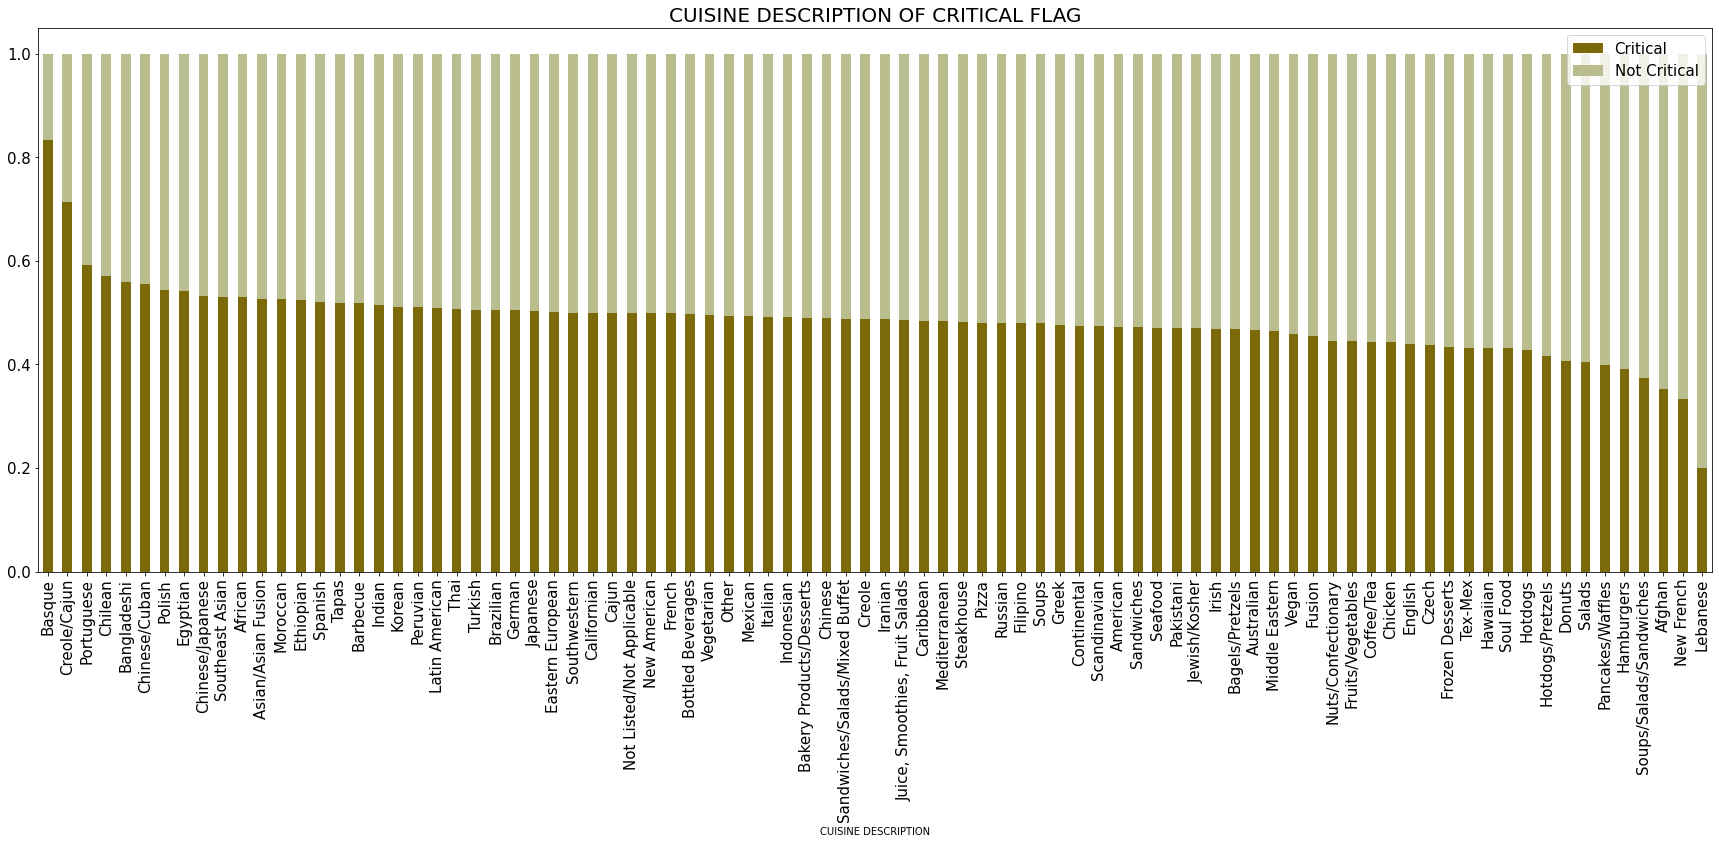

In [ ]:
colors = ["#7C6A0A","#BABD8D","#FA9500","#FFDAC6","#EB6424"]
criticalflag.plot.bar(x = "CUISINE DESCRIPTION", stacked = True, figsize=(30,10),fontsize = 15,color = colors).legend(loc = 'upper right',fontsize = 15, bbox_to_anchor = (1.0, 1.0))
plt.title('CUISINE DESCRIPTION OF CRITICAL FLAG',fontsize=20)


In [ ]:
#cuisin = df.groupby(['CUISINE DESCRIPTION']).agg({'CAMIS':'count'}).rename(columns={'CAMIS':'NUMBER'}).reset_index()
#cuisin = cuisin.sort_values('NUMBER',ascending = False)
#cuisin

# Grade


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/NYC_restaurant_inspection.csv')
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
0,0,50005854,TENDO SUSHI,Queens,11385.0,Japanese,2018-02-27,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,13.0,A,2018-02-27,2021-12-01,Cycle Inspection / Initial Inspection,40.708195,-73.897878
1,1,41396677,STAND 132,Bronx,10451.0,American,2019-08-14,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,12.0,A,2019-08-14,2021-12-01,Cycle Inspection / Initial Inspection,40.829028,-73.928496
2,3,50033882,BROWN BROTHERS HARRIMAN,Manhattan,10005.0,American,2018-08-01,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,12.0,A,2018-08-01,2021-12-01,Cycle Inspection / Initial Inspection,40.709036,-74.010626
3,4,41649471,PIZZA PRINCE,Brooklyn,11222.0,Pizza,2018-07-05,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,26.0,B,2018-07-05,2021-12-01,Cycle Inspection / Re-inspection,40.723850,-73.950505
4,5,50107759,KOBE SUSHI JAPANESE CUISINE,Manhattan,10075.0,Japanese,2021-10-13,Violations were cited in the following area(s).,10D,Mechanical or natural ventilation system not p...,Not Critical,7.0,A,2021-10-13,2021-12-01,Pre-permit (Operational) / Initial Inspection,40.770904,-73.950773


In [ ]:
cuisinesort = cuisine.sort_values(by='CAMIS', ascending=False)
cuisinesort.head(5)

,CUISINE DESCRIPTION,CAMIS
2,American,37435
17,Chinese,19344
64,Pizza,11721
20,Coffee/Tea,10754
45,Italian,7641


In [ ]:
cuisinetop5 = cuisinesort[0:5]
cuisinetop5

,CUISINE DESCRIPTION,CAMIS
2,American,37435
17,Chinese,19344
64,Pizza,11721
20,Coffee/Tea,10754
45,Italian,7641


In [ ]:
cuisinetop5['CUISINE DESCRIPTION'].unique

<bound method Series.unique of 2       American
17       Chinese
64         Pizza
20    Coffee/Tea
45       Italian
Name: CUISINE DESCRIPTION, dtype: object>

In [ ]:
df1.head()

,CUISINE DESCRIPTION,GRADE,CRITICAL FLAG,CAMIS,SCORE
0,Afghan,A,Critical,29,10.689655
1,Afghan,A,Not Critical,57,8.596491
2,Afghan,B,Critical,6,23.500000
3,Afghan,B,Not Critical,2,23.500000
4,Afghan,C,Not Critical,1,2.000000


In [ ]:
#mylist = ['American','Chinese','Pizza','Coffee/Tea','Italian']
#cuisinet5 = df1['American']
cuisinet5 = df1.loc[df1['CUISINE DESCRIPTION'].isin(['American','Chinese','Pizza','Coffee/Tea','Italian'])]
cuisinet5 = cuisinet5.loc[cuisinet5['GRADE'].isin(['A','B','C'])]
cuisinet5 = cuisinet5.groupby(['CUISINE DESCRIPTION','GRADE']).agg({'CAMIS':'sum'}).reset_index()
cuisinet5

,CUISINE DESCRIPTION,GRADE,CAMIS
0,American,A,31428
1,American,B,3737
2,American,C,1286
3,Chinese,A,14118
4,Chinese,B,3027
5,Chinese,C,1041
6,Coffee/Tea,A,9324
7,Coffee/Tea,B,650
8,Coffee/Tea,C,240
9,Italian,A,6249


In [ ]:
cuisine1 = cuisinet5.groupby(["CUISINE DESCRIPTION"]).agg({"CAMIS":'sum'}).reset_index()
cuisine1

,CUISINE DESCRIPTION,CAMIS
0,American,36451
1,Chinese,18186
2,Coffee/Tea,10214
3,Italian,7435
4,Pizza,11211


In [ ]:
cuisinet5['PERCENT'] = cuisinet5.apply(lambda x: x['CAMIS'] / 
                                                 cuisine1.loc[cuisine1['CUISINE DESCRIPTION']==x['CUISINE DESCRIPTION']]['CAMIS'].values[0],axis = 1)
cuisinet5

,CUISINE DESCRIPTION,GRADE,CAMIS,PERCENT
0,American,A,31428,0.862199
1,American,B,3737,0.102521
2,American,C,1286,0.035280
3,Chinese,A,14118,0.776311
4,Chinese,B,3027,0.166447
5,Chinese,C,1041,0.057242
6,Coffee/Tea,A,9324,0.912865
7,Coffee/Tea,B,650,0.063638
8,Coffee/Tea,C,240,0.023497
9,Italian,A,6249,0.840484


In [ ]:
cuisinet5['CUISINE DESCRIPTION'].unique()

array(['American', 'Chinese', 'Coffee/Tea', 'Italian', 'Pizza'],
      dtype=object)

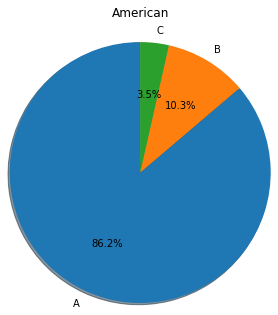

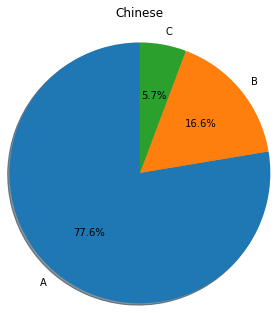

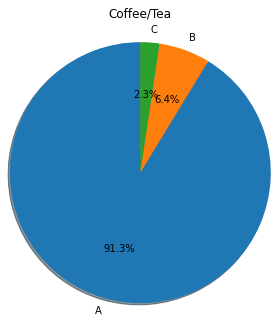

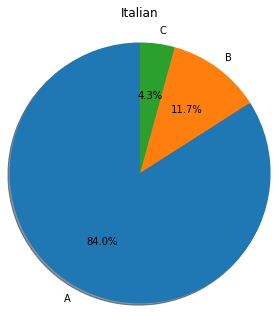

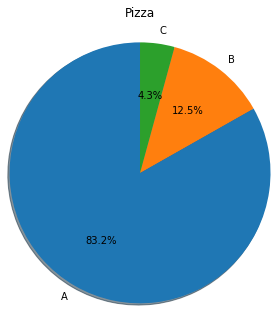

In [ ]:
#5.
for i in cuisinet5['CUISINE DESCRIPTION'].unique():
    temp = cuisinet5[cuisinet5['CUISINE DESCRIPTION'] == i]
    #temp.rename(columns={'CMPLNT_NUM':'totCrimes'}, inplace=True)
    #temp['perc_totCrime'] = temp['totCrimes']/temp['totCrimes'].sum()*100
    
    fig1, ax1 = plt.subplots()
    ax1.pie(temp.PERCENT, labels=temp['GRADE'], autopct='%1.1f%%',
        shadow=True, startangle=90, radius=1.5)
    #ax1.axis('equal')
    #plt.title(boro, loc='left')
    ax1.set_title(i, y=1.19)

In [ ]:
#df1.to_csv('/content/drive/MyDrive/Colab Notebooks/data/df1.csv')

In [ ]:
#ax = plt.subplot(1, 1, 1)
#ax.boxplot(np.log10(df2.CAMIS), whis=[1, 99]) #box plot of the log trip_distance with 1 and 99 percentiles and the outliers beyond them
#ax.set_yticks(np.arange(-1, 3))
#ax.set_yticklabels(10.0**np.arange(-1, 3, 1))
#ax.set_title('Taxi trip distance distribution, miles')
#plt.show()

# **Score**

In [ ]:
score = df.groupby(['CUISINE DESCRIPTION']).agg({'SCORE':'mean'})
score = score.sort_values(by = 'SCORE', ascending= False)
score

,SCORE
CUISINE DESCRIPTION,
Fusion,27.090909
Creole/Cajun,24.984127
Iranian,24.974359
African,20.234965
Bangladeshi,19.955684
...,...
Nuts/Confectionary,9.444444
Scandinavian,9.421053
Czech,9.375000


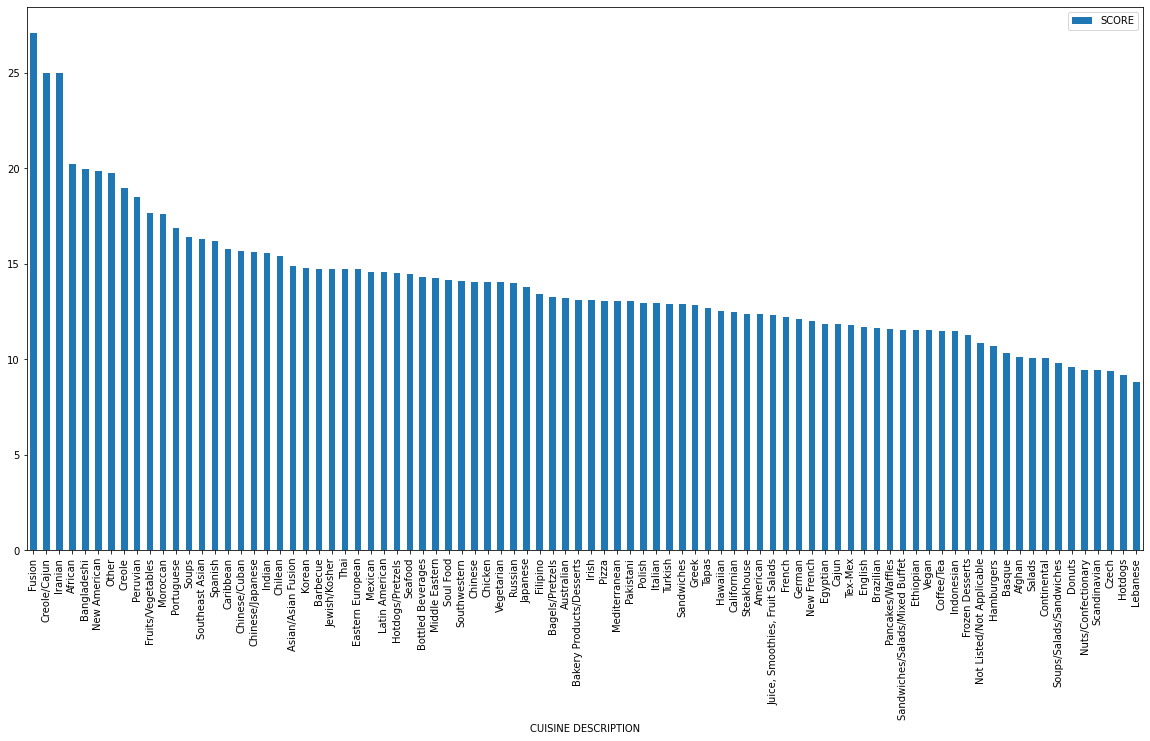

In [ ]:
score.plot.bar(figsize = (20,10), fontsize = 10)

# **Zipcode & Cuisine(country)**

In [ ]:
import geopandas as gpd
zips = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/ZIP_CODE_040114.shp')
from shapely.geometry import Point
from matplotlib import pyplot as plt
df['geometry'] = df.apply(lambda x :Point(x['Longitude'],x['Latitude']),axis=1)
zips

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [ ]:
mylist = ['American','Chinese','Italian','Japanese','Mexican','Caribbean','Spanish',
          'Indian','Jewish/Kosher','Thai','Korean','French','Mediterranean','Irish',
          'Greek','Peruvian','Turkish','Bangladeshi','Russian','Filipino','German',
          'Pakistani','Polish','Brazilian','Australian','Creole','English','Ethiopian',
          'Afghan','Portuguese','Moroccan','Egyptian','Asian/Asian Fusion','Hawaiian',
          'Latin American','New American','New French','Tex-Mex','Middle Eastern',
          'Eastern European','Chinese/Japanese','Continental','Chinese/Cuban','African',
          'Southeast Asian','Creole/Cajun','Californian','Southwestern','Fusion']

cuisinebycountry = df.loc[df['CUISINE DESCRIPTION'].isin(mylist)]
#cuisinebycountry = cuisinebycountry.loc[cuisinebycountry['GRADE'].isin(['A','B','C'])]
#cuisinebycountry = cuisinebycountry.groupby(['CUISINE DESCRIPTION']).agg({'CAMIS':'sum'}).reset_index()
cuisinebycountry.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,geometry
0,0,50005854,TENDO SUSHI,Queens,11385.0,Japanese,2018-02-27,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,13.0,A,2018-02-27,2021-12-01,Cycle Inspection / Initial Inspection,40.708195,-73.897878,POINT (-73.89787770230301 40.708194784449)
1,1,41396677,STAND 132,Bronx,10451.0,American,2019-08-14,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,12.0,A,2019-08-14,2021-12-01,Cycle Inspection / Initial Inspection,40.829028,-73.928496,POINT (-73.928496459645 40.829028434834)


In [ ]:
#pip install geopandas
#!pip install mapclassify

In [ ]:
geoData = gpd.GeoDataFrame(cuisinebycountry,geometry = cuisinebycountry['geometry'])

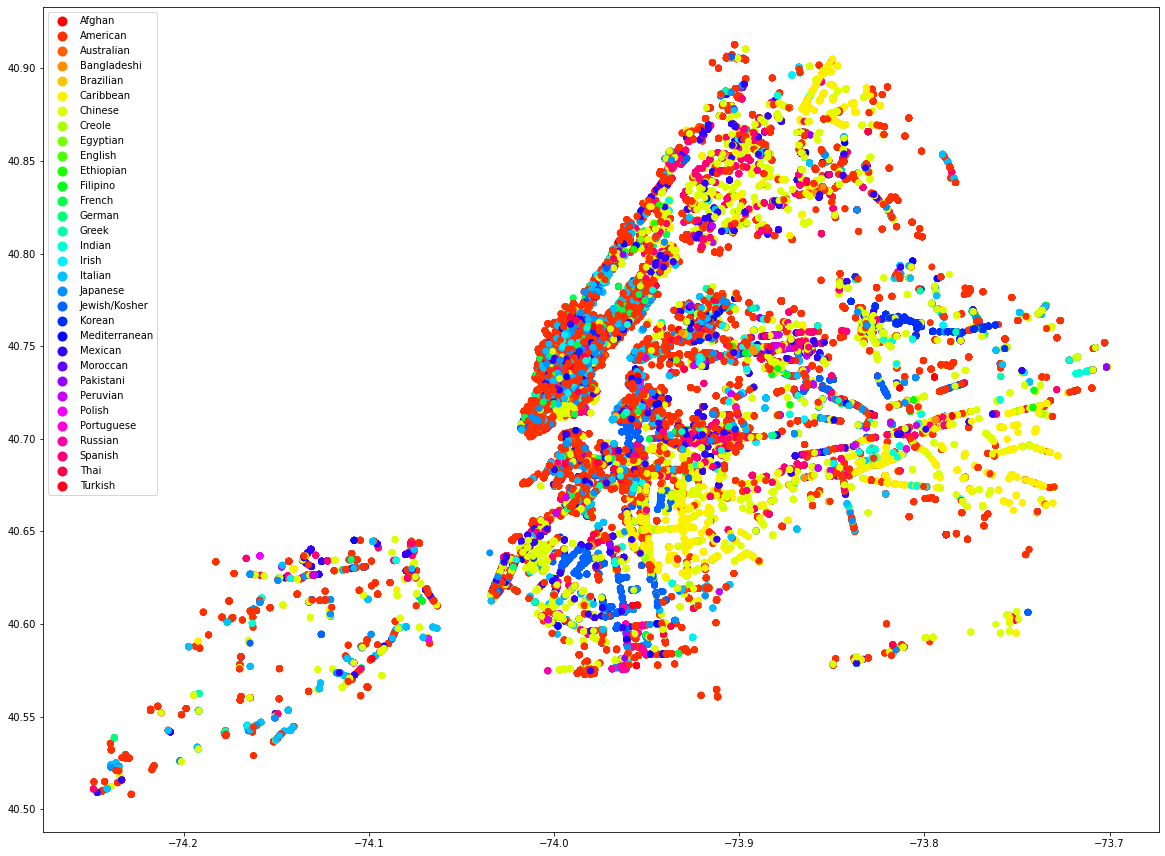

In [ ]:
geoData.plot(column='CUISINE DESCRIPTION',cmap='hsv',figsize=(20,20),legend=True)

In [ ]:
zip_country = cuisinebycountry.groupby(['ZIPCODE','CUISINE DESCRIPTION']).\
            agg({'CAMIS':'count'}).reset_index()
zip_country['ZIPCODE'] = zip_country['ZIPCODE'].astype(int).astype(str)
zip_country_all = cuisinebycountry.groupby(['ZIPCODE']).\
            agg({'CAMIS':'count'}).reset_index()
zip_country_all['ZIPCODE'] = zip_country_all['ZIPCODE'].astype(int).astype(str)
zip_country['COUNTRY PERCENT']=zip_country.apply(lambda x:x['CAMIS']/zip_country_all[zip_country_all['ZIPCODE']==x['ZIPCODE']]['CAMIS'].values[0]*100, axis = 1)
zips_geo = zips[['ZIPCODE','geometry']].sort_values(by = ['ZIPCODE'],ascending = True)
zips_geo['ZIPCODE'] = zips_geo['ZIPCODE'].astype(str)
#critical_data = zip_critical[zip_critical['CRITICAL FLAG']=='Critical']

zip_country

,ZIPCODE,CUISINE DESCRIPTION,CAMIS,COUNTRY PERCENT
0,10000,American,9,50.000000
1,10000,French,9,50.000000
2,10001,American,1056,49.787836
3,10001,Australian,10,0.471476
4,10001,Chinese,76,3.583215
...,...,...,...,...
1830,11694,Italian,2,1.626016
1831,11694,Japanese,11,8.943089
1832,11694,Mexican,9,7.317073
1833,11697,American,32,100.000000


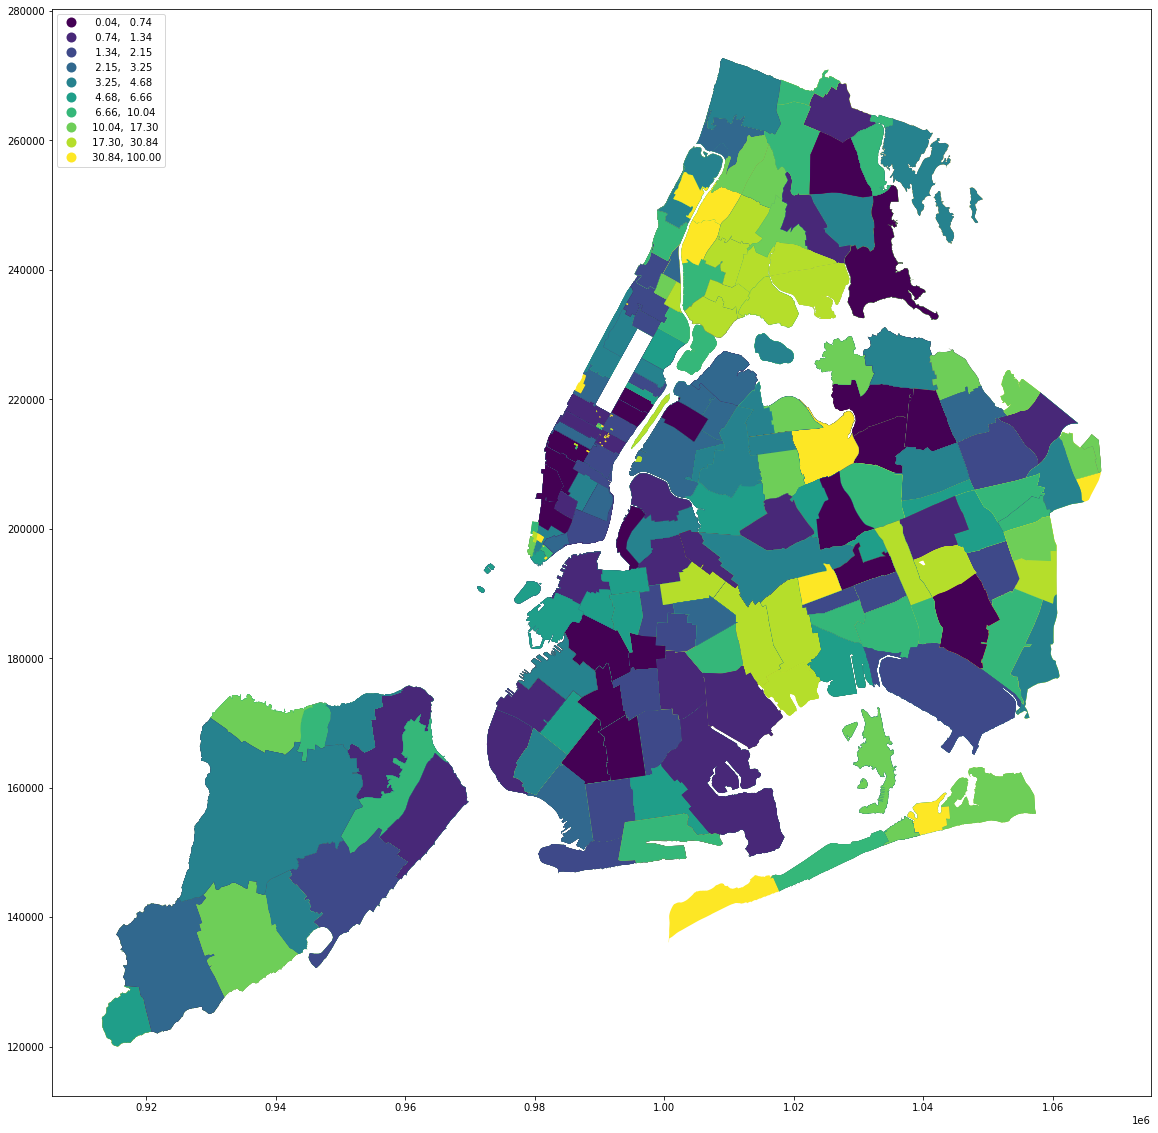

In [ ]:
geo_data = pd.merge(zip_country, zips_geo, on = 'ZIPCODE')
geo_data = gpd.GeoDataFrame(geo_data)
geo_data.plot(figsize=(20,20), column='COUNTRY PERCENT', k=10, scheme='Quantiles',legend=True,legend_kwds={'loc': 'upper left'})

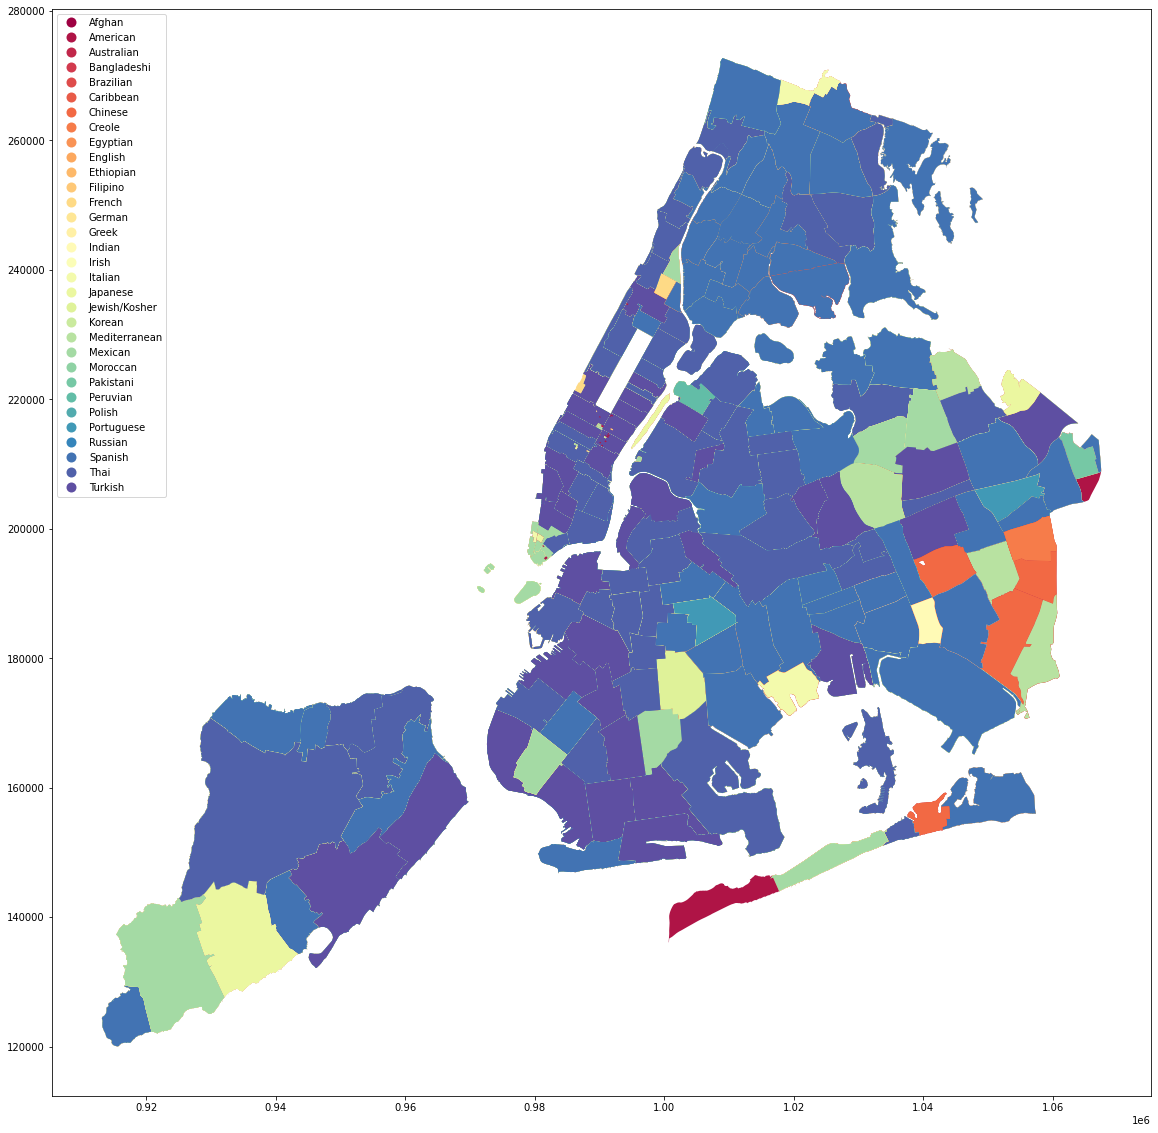

In [ ]:
geo_data.plot(figsize=(20,20), column='CUISINE DESCRIPTION', cmap = 'Spectral',k=10,legend=True,legend_kwds={'loc': 'upper left'})

In [ ]:
class Animal():
  def __init__(self, name):
    self.name = name
  def greet(self):
    print(f'Hello, I am {self.name}.')

class Dog(Animal):
  def greet(self):
    print(f'WangWang.., I am {self.name}.')

class Cat(Animal):
  def greet(self):
    print(f'MiaoMiao.., I am {self.name}.')

def hello(animal):
  animal.greet()

In [ ]:
dog = Dog('dog')
cat = Cat('cat')
hello(dog)
print(dog.greet())

WangWang.., I am dog.
WangWang.., I am dog.
None
